In [41]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output

In [50]:
def Q_learn(env, beta=1.0, gamma=0.9, epsilon=0.1, num_episodes=1000, visualize=False, t_max=100):
    # Action value function
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    # Keeps track of useful statistics
    stats = {'episode_lengths': np.zeros(num_episodes),
             'episode_rewards': np.zeros(num_episodes)}
    for i_episode in range(num_episodes):
        # Reset the environment and pick the first action
        state = env.reset()[0]
        for t in range(t_max):
            # Choose an action to take
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()

            else:
                action = np.argmax(Q[state, :])
            # Take a step
            next_state, reward, done, _, _ = env.step(action)
            # Update statistics
            stats['episode_rewards'][i_episode] += reward
            stats['episode_lengths'][i_episode] = t
            # Update Q
            Q[state, action] += beta * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            # Update the state
            state = next_state
            if visualize:
                img = env.render()
                plt.imshow(img)
                plt.title(f"Reward: {stats['episode_rewards'][i_episode]}, Episode: {i_episode}, Time: {t}")
                plt.axis('off')
                plt.show()
                sleep(0.01)
                clear_output(wait=True)
            # End the episode if we reach the goal
            if done:
                break
    return Q, stats

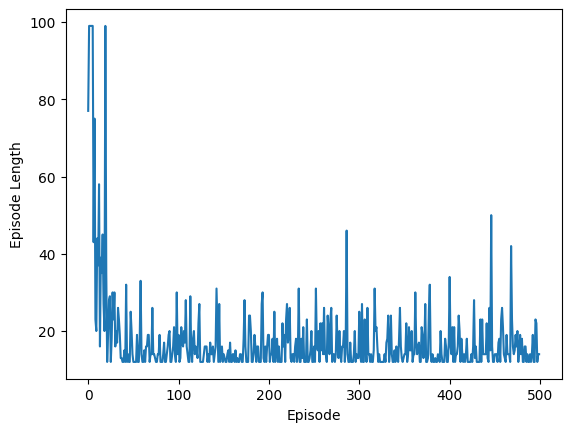

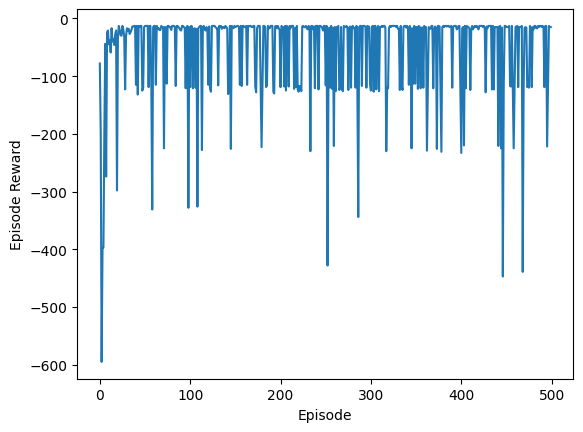

In [52]:
env = gym.make('CliffWalking-v0', render_mode='rgb_array')
env.reset()
Q, stats = Q_learn(env, num_episodes=500, visualize=False)
plt.plot(stats['episode_lengths'])
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.show()

plt.plot(stats['episode_rewards'])
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.show()